In [432]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 0. Tips data EDTA

In [433]:
df = sns.load_dataset("tips")
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### a)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [435]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### b) plot descriptive stats

In [436]:
# create df with descriptive statistics only for plotting
df_describe = df[['total_bill', 'tip', 'size']].describe().drop(['count'])
df_describe


,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Text(0.5, 0.98, 'Descriptive statistics')

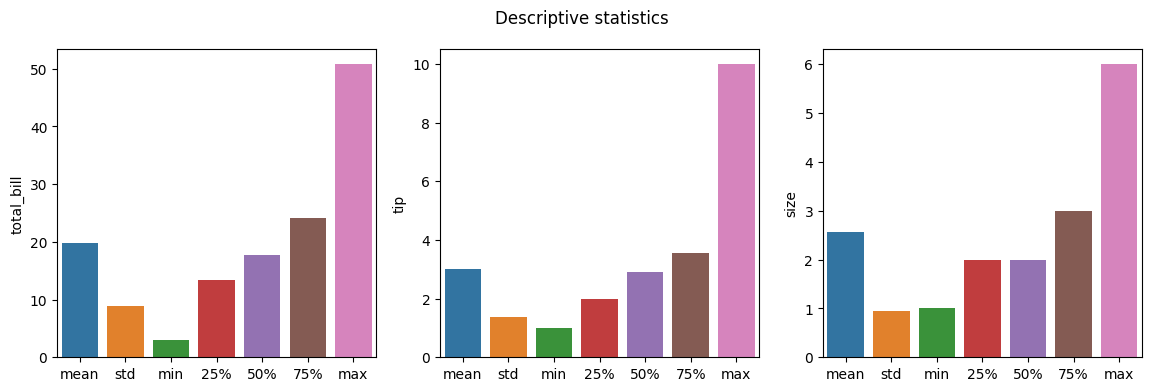

In [437]:
# plot

fig, ax = plt.subplots(1, 3, figsize = (14,4))

for i, feature in enumerate(df_describe.columns): 
    sns.barplot(data = df_describe, x = df_describe.index, y=feature, ax=ax[i])

fig.suptitle('Descriptive statistics')

# df_describe.columns returns list of names of all columns in df

### c) other interesting plots

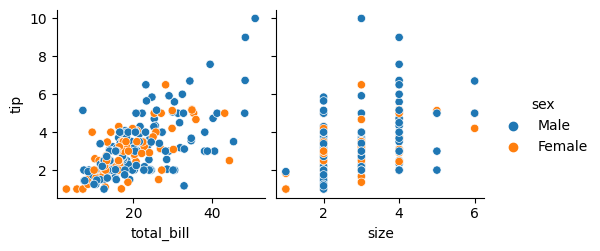

In [438]:
sns.pairplot(df, y_vars='tip', x_vars=['total_bill','size'], hue='sex');

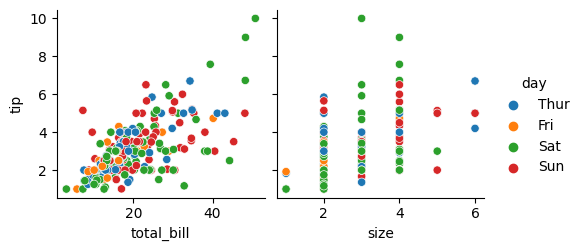

In [458]:
sns.pairplot(df, y_vars='tip', x_vars=['total_bill','size'], hue='day');

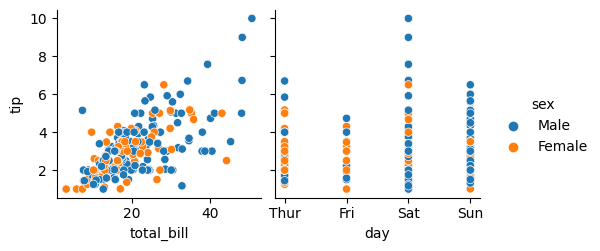

In [460]:
sns.pairplot(df, y_vars='tip', x_vars=['total_bill','day'], hue='sex');

In [440]:
#TODO: make more plots on whole df, scatterplott, boxplott

### d) results/discussion

TODO: add analysis of plots

---
## 1. Test|split

In [441]:
from sklearn.model_selection import train_test_split


X, y = df.drop(['tip'], axis="columns"), df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.head(3))
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

     total_bill   sex smoker  day    time  size
234       15.53  Male    Yes  Sat  Dinner     2
227       20.45  Male     No  Sat  Dinner     4
180       34.65  Male    Yes  Sun  Dinner     4


((244, 6), (170, 6), (74, 6), (244,), (170,), (74,))

## 2. Feature standardization

In [442]:
from sklearn.preprocessing import StandardScaler

# preprocessing X_train and X_test with standard scaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train[['total_bill', 'size']]) 
scaled_X_test = scaler.transform(X_test[['total_bill', 'size']])

print(f'X_train:\n {X_train.head(3)} \n\n scaled_X_train: \n{scaled_X_train[:3]}')


print(f"\n scaled_x_train (total_bilil) mean and std :\n {scaled_X_train[:,0].mean():.2f}, {scaled_X_train[:,0].std()}")
print(f"\n scaled_x_train (size) mean and std :\n {scaled_X_train[:,1].mean():.2f}, {scaled_X_train[:,1].std()}")
print(f"\n scaled_x_test (total_bill) mean and std:\n {scaled_X_test[:,0].mean():.2f}, {scaled_X_test[:,0].std():.2f}")
print(f"\n scaled_x_test (size) mean and std:\n {scaled_X_test[:,1].mean():.2f}, {scaled_X_test[:,1].std():.2f}")

# NOTE scaler results in a np array so X_train (df) gives scaled_X_train (np)
# NOTE feature standardisaion/scailng is needed for some models, for example gradient descent but not for LinReg or Poly w OLS

# TODO: rewrite the code with pd.get_dummies() för att ersötta text med siffror och då inte tappa bort kolumner med text so jag gör på rad 6 o 7


X_train:
      total_bill   sex smoker  day    time  size
234       15.53  Male    Yes  Sat  Dinner     2
227       20.45  Male     No  Sat  Dinner     4
180       34.65  Male    Yes  Sun  Dinner     4 

 scaled_X_train: 
[[-0.52806763 -0.62551827]
 [ 0.01509878  1.52272629]
 [ 1.58277419  1.52272629]]

 scaled_x_train (total_bilil) mean and std :
 0.00, 1.0

 scaled_x_train (size) mean and std :
 -0.00, 1.0

 scaled_x_test (total_bill) mean and std:
 -0.19, 0.92

 scaled_x_test (size) mean and std:
 -0.04, 1.06


## 3. Polynomial features

In [443]:
from sklearn.preprocessing import PolynomialFeatures

poly_instance = PolynomialFeatures(2, include_bias=False)
X_features_train = poly_instance.fit_transform(scaled_X_train)
X_features_test = poly_instance.transform(scaled_X_test)

X_features_test_fit_trans = poly_instance.fit_transform(scaled_X_test)

print(np.array_equal(X_features_test, X_features_test_fit_trans)) # this is a special case where vectors actually are the same


# sum([X_features_test == X_features_test_fit_trans]) # TODO kolla någons lösning för att få längden


True


## 4. Polynomial regressn

In [444]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = range(1,5)

rmse_list_train = []
rmse_list_test = []

for degree in degrees:
    poly_instance = PolynomialFeatures(degree=degree, include_bias=False)
    
    X_features_train = poly_instance.fit_transform(scaled_X_train)
    X_features_test = poly_instance.transform(scaled_X_test)

    model = LinearRegression()
    model.fit(X_features_train, y_train)

    y_pred_train = model.predict(X_features_train)
    y_pred_test = model.predict(X_features_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    rmse_list_train.append(rmse_train)
    rmse_list_test.append(rmse_test)


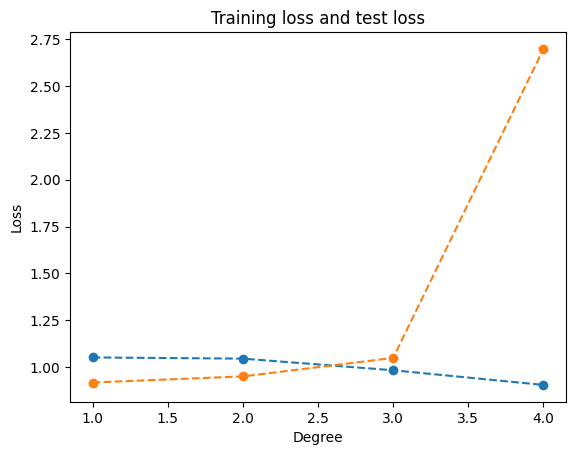

In [445]:
# plot results

fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,5), rmse_list_train, '--o', label = 'Training loss' )
ax.plot(range(1,5), rmse_list_test,  '--o', label = 'Test loss' )
ax.set(xlabel = "Degree", ylabel = "Loss", title = "Training loss and test loss");

## 5. Regularization methods

---
#### Data preparation alt 1 with get_dummies() - better alternative

In [461]:
df = sns.load_dataset('tips')
df = pd.get_dummies(df, drop_first=True) # drop_first=True removes columns which can be calculated from others: sex_Male since oposite to sex_Female
X, y = df.drop(['tip'], axis="columns"), df['tip']
X.head(), y.head(),X.shape, y.shape

(   total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
 0       16.99     2           1          1        0        0        1   
 1       10.34     3           0          1        0        0        1   
 2       21.01     3           0          1        0        0        1   
 3       23.68     2           0          1        0        0        1   
 4       24.59     4           1          1        0        0        1   
 
    time_Dinner  
 0            1  
 1            1  
 2            1  
 3            1  
 4            1  ,
 0    1.01
 1    1.66
 2    3.50
 3    3.31
 4    3.61
 Name: tip, dtype: float64,
 (244, 8),
 (244,))

#### Polynomial features (on df from get_dummies())

In [462]:
from sklearn.preprocessing import PolynomialFeatures

model_polynomial = PolynomialFeatures(4, include_bias=False) 
polynomial_features = model_polynomial.fit_transform(X)
X.shape, polynomial_features.shape

((244, 8), (244, 494))

#### train|test split (on df from get_dummies())

In [463]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((163, 494), (81, 494), (163,), (81,))

#### Feature standardisation

In [464]:
from sklearn.preprocessing import StandardScaler

#scaling with standard scaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# for scaled_X_train mean = 0, std = 1, which is expected
scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(-1.411873000193935e-18,
 0.8735890880367281,
 -0.01817068568762451,
 0.8284657794573888)

In [ ]:
# TODO: make function def print_modeling_results():

### a). Ridge with cross-validation

In [465]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_ridgeCV = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10], scoring="neg_mean_squared_error") # cv = 5 eller cv = 10
model_ridgeCV.fit(scaled_X_train, y_train)

y_pred = model_ridgeCV.predict(scaled_X_test)

print(f'alpha = {model_ridgeCV.alpha_}')
print(f'weights = {model_ridgeCV.coef_}')

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

MAE, MSE, RMSE


alpha = 10.0
weights = [ 0.3523099   0.06826969 -0.03117835 -0.03201763 -0.01850156 -0.0383721
  0.0249515  -0.0061083   0.20871969  0.12384646  0.07193159  0.11704968
  0.00580343  0.03453439 -0.0397833   0.01204873  0.06571415  0.00058181
 -0.12986974 -0.02990601  0.00375759  0.04630201  0.05934982 -0.03117835
 -0.013382   -0.02247764 -0.01837937  0.0178694   0.0023477  -0.03201763
 -0.00096425  0.02866758 -0.04630045 -0.01264835 -0.01850156  0.
  0.         -0.00686066 -0.0383721   0.         -0.0383721   0.0249515
  0.0249515  -0.0061083   0.18433486  0.04177963 -0.02831974  0.0609809
 -0.01876282  0.02709547 -0.0868779  -0.03672571 -0.01473773  0.07225514
  0.05084199  0.01102838 -0.01274927 -0.01794296 -0.01322271  0.07193159
 -0.02282829  0.08932839 -0.01938132 -0.03772415 -0.01203118  0.11704968
  0.02002383  0.03944012  0.03260844  0.06663713  0.00580343  0.
  0.          0.013731    0.03453439  0.          0.03453439 -0.0397833
 -0.0397833   0.01204873  0.05745091 -0.01599159

(0.799005336497818, 1.0610467318307994, 1.0300712265813463)

### b) LASSSO with cross-validation

In [467]:
from sklearn.linear_model import LassoCV

model_lassoCV = LassoCV(n_alphas=100, max_iter=int(5e4))
model_lassoCV.fit(scaled_X_train, y_train)

print(f'alpha = {model_lassoCV.alpha_}')
print(f'weights = {model_lassoCV.coef_}')

y_pred = model_lassoCV.predict(scaled_X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

MAE, MSE, RMSE

alpha = 0.11894444497837664
weights = [ 0.4749732   0.         -0.         -0.          0.         -0.
  0.         -0.          0.          0.20795761 -0.          0.
  0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.          0.
  0.          0.         -0.          0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.          0.         -0.          0.          0.
 -0.          0.          0.         -0.         -0.

(0.7582915075477507, 0.9841672466019541, 0.9920520382530112)

### c) ElasticNet with cross-validation

In [468]:
from sklearn.linear_model import ElasticNetCV

model_elasticnetCV = ElasticNetCV(n_alphas=100, max_iter=int(5e4), l1_ratio=[.001,.01,.05,.1,.5,.9,.95,1])
model_elasticnetCV.fit(scaled_X_train, y_train)

print(f'alpha = {model_elasticnetCV.alpha_}')
print(f'L1-ratio = {model_elasticnetCV.l1_ratio_}')
print(f'weights = {model_elasticnetCV.coef_}')

y_pred = model_elasticnetCV.predict(scaled_X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

MAE, MSE, RMSE

c:\Users\DorotaBjöörn-AI22GBG\.virtualenvs\Machine-Learning-Dorota-Bjoorn-ugpTJiOr\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.229e-02, tolerance: 2.683e-02
  model = cd_fast.enet_coordinate_descent(


alpha = 0.11894444497837664
L1-ratio = 1.0
weights = [ 0.4749732   0.         -0.         -0.          0.         -0.
  0.         -0.          0.          0.20795761 -0.          0.
  0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.          0.
  0.          0.         -0.          0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.          0.         -0.          0.          0.
 -0.          0.          0.         

(0.7582915075477507, 0.9841672466019541, 0.9920520382530112)

---
---
#### Data preparation alt 2 - create df with only numeric values - worse but faster alternative

In [448]:
# load dataset
df = sns.load_dataset('tips')

# select numerical colums to create X and y
X, y = df[['total_bill', 'size']], df['tip']
X.shape, y.shape


((244, 2), (244,))

#### Plynomial features

In [449]:
from sklearn.preprocessing import PolynomialFeatures

# engineer polynomial features from X
model_polynomial = PolynomialFeatures(4, include_bias=False) 
polynomial_features = model_polynomial.fit_transform(X) # NOTE X is df, polynomial_features is np array

# 2 columns -> 14 columns
X.shape, polynomial_features.shape

((244, 2), (244, 14))

#### train|test split

In [450]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((163, 14), (81, 14), (163,), (81,))

#### Feature standardisation

In [451]:
from sklearn.preprocessing import StandardScaler

#scaling with standard scaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# for scaled_X_train mean = 0, std = 1, which is expected
scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(-1.8059368393552065e-16, 1.0, 0.05713059068422285, 1.2299477151059277)

### a). Ridge with cross-validation

In [452]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_ridgeCV = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10], scoring="neg_mean_squared_error") # cv = 5 eller cv = 10
model_ridgeCV.fit(scaled_X_train, y_train)

print(f'alpha = {model_ridgeCV.alpha_}')
print(f'weights = {model_ridgeCV.coef_}')

alpha = 10.0
weights = [ 0.40148158  0.07473296 -0.00582492  0.20348771  0.03476736 -0.06224482
  0.06934357  0.06990532  0.00360957  0.14587816  0.13724285  0.0701817
 -0.00648861 -0.00779538]


In [453]:
y_pred = model_ridgeCV.predict(scaled_X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

MAE, MSE, RMSE

(0.8021255884697003, 1.131219757842038, 1.0635881523606956)

#### b) LASSO with cross-validation

In [454]:
from sklearn.linear_model import LassoCV

model_lassoCV = LassoCV(n_alphas=100, max_iter=int(5e4))
model_lassoCV.fit(scaled_X_train, y_train)

print(f'alpha = {model_lassoCV.alpha_}')
print(f'weights = {model_lassoCV.coef_}')


alpha = 0.03387580456496054
weights = [0.34959198 0.         0.         0.4997257  0.         0.
 0.         0.         0.         0.         0.21308423 0.
 0.         0.        ]


In [455]:
y_pred = model_lassoCV.predict(scaled_X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

MAE, MSE, RMSE

(0.7853728083568148, 1.0630863503865708, 1.0310607888900494)

### c) ElasticNet with cross-validation

In [456]:
from sklearn.linear_model import ElasticNetCV

model_elasticnetCV = ElasticNetCV(n_alphas=100, max_iter=int(5e4), l1_ratio=[.001,.01,.05,.1,.5,.9,.95,1])
model_elasticnetCV.fit(scaled_X_train, y_train)

print(f'alpha = {model_elasticnetCV.alpha_}')
print(f'L1-ratio = {model_elasticnetCV.l1_ratio_}')
print(f'weights = {model_elasticnetCV.coef_}')


alpha = 0.3632391485423487
L1-ratio = 0.01
weights = [0.20375432 0.06542731 0.10809885 0.13089245 0.04294677 0.07324139
 0.09815745 0.07246531 0.01967225 0.08831352 0.09324619 0.07247109
 0.03053337 0.        ]


In [457]:
y_pred = model_elasticnetCV.predict(scaled_X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)

MAE, MSE, RMSE

(0.823326443785215, 1.1612506270591925, 1.0776133940607793)